In [71]:
! pip install opendatasets

In [72]:
import opendatasets as od

od.download("https://www.kaggle.com/datasets/camnugent/california-housing-prices/data")

Skipping, found downloaded files in "./california-housing-prices" (use force=True to force download)


In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [74]:
df = pd.read_csv('california-housing-prices/housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [76]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [77]:
df.describe(include='object')

,ocean_proximity
count,20640
unique,5
top,<1H OCEAN
freq,9136


In [78]:
df.dropna(inplace=True)

In [79]:
df.duplicated().sum()

np.int64(0)

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [81]:
from sklearn.model_selection import train_test_split

X = df.drop(['median_house_value'],axis=1)
Y = df.median_house_value

In [82]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [83]:
data_train = X_train.join(Y_train)
data_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
17727,-121.80,37.32,14.0,4412.0,924.0,2698.0,891.0,4.7027,<1H OCEAN,227600.0
2057,-119.63,36.64,33.0,1036.0,181.0,620.0,174.0,3.4107,INLAND,110400.0
6453,-118.06,34.12,25.0,3891.0,848.0,1848.0,759.0,3.6639,INLAND,248100.0
4619,-118.31,34.07,28.0,2362.0,949.0,2759.0,894.0,2.2364,<1H OCEAN,305600.0
15266,-117.27,33.04,27.0,1839.0,392.0,1302.0,404.0,3.5500,NEAR OCEAN,214600.0


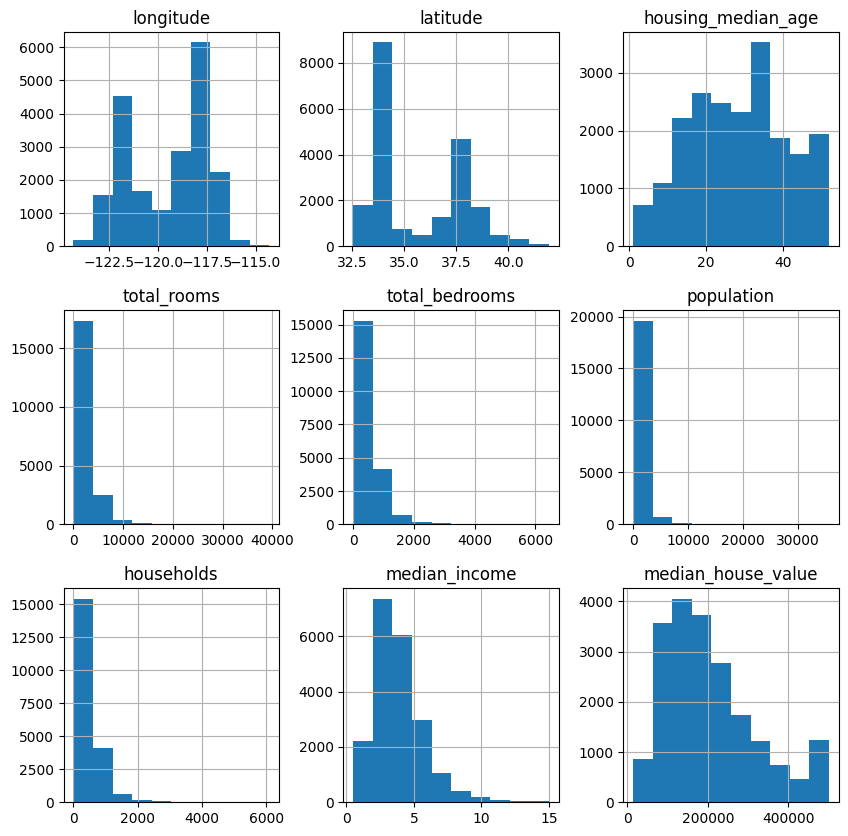

In [84]:
df.hist(figsize=(10,10));

<Axes: >

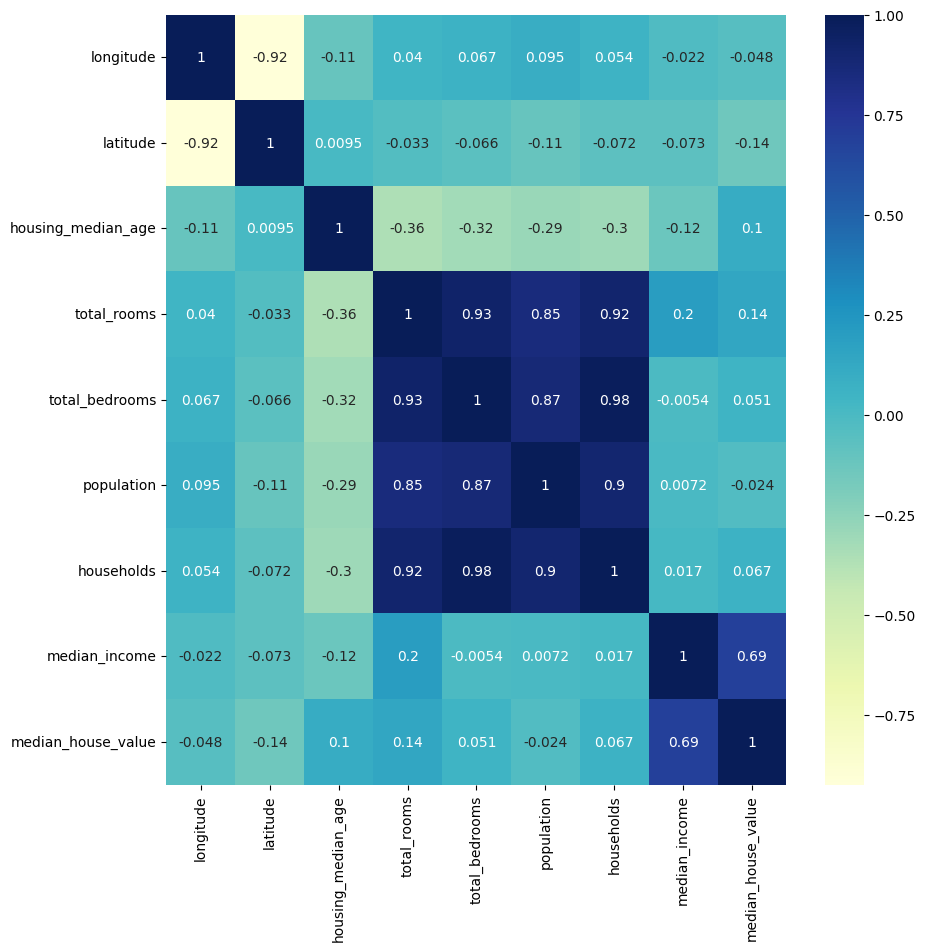

In [85]:
plt.figure(figsize=(10,10))
sns.heatmap(data_train.select_dtypes(include=np.number).corr(), annot=True, cmap='YlGnBu')

In [86]:
data_train['population'] = np.log1p(data_train.population)
data_train['households'] = np.log1p(data_train.households)
data_train['total_rooms'] = np.log1p(data_train.total_rooms)
data_train['total_bedrooms'] = np.log1p(data_train.total_bedrooms)

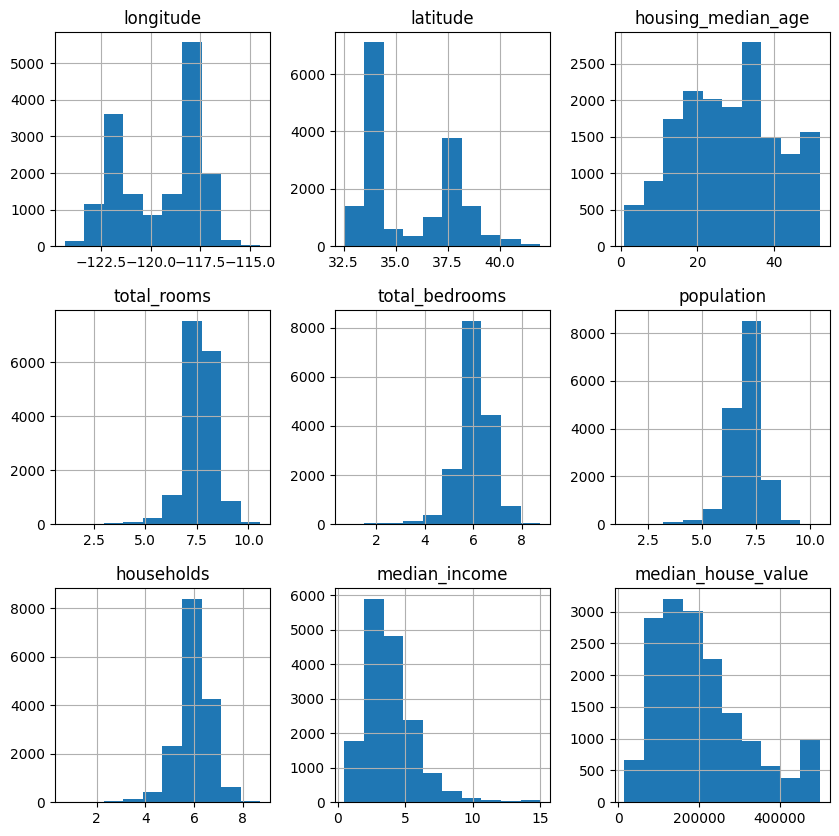

In [87]:
data_train.hist(figsize=(10,10));

In [88]:
pd.get_dummies(data_train['ocean_proximity'])

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
17727,True,False,False,False,False
2057,False,True,False,False,False
6453,False,True,False,False,False
4619,True,False,False,False,False
15266,False,False,False,False,True
...,...,...,...,...,...
11397,True,False,False,False,False
12081,True,False,False,False,False
5447,True,False,False,False,False
866,False,False,False,True,False


In [89]:
data_train = data_train.join(pd.get_dummies(data_train['ocean_proximity']).astype(int)).drop(['ocean_proximity'],axis=1)

In [90]:
data_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
17727,-121.80,37.32,14.0,8.392310,6.829794,7.900637,6.793466,4.7027,227600.0,1,0,0,0,0
2057,-119.63,36.64,33.0,6.944087,5.204007,6.431331,5.164786,3.4107,110400.0,0,1,0,0,0
6453,-118.06,34.12,25.0,8.266678,6.744059,7.522400,6.633318,3.6639,248100.0,0,1,0,0,0
4619,-118.31,34.07,28.0,7.767687,6.856462,7.922986,6.796824,2.2364,305600.0,1,0,0,0,0
15266,-117.27,33.04,27.0,7.517521,5.973810,7.172425,6.003887,3.5500,214600.0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11397,-117.97,33.72,24.0,8.003697,6.216606,7.271009,6.118097,5.4286,273400.0,1,0,0,0,0
12081,-117.54,33.76,5.0,8.673684,6.943122,8.089176,6.909753,4.7965,160800.0,1,0,0,0,0
5447,-118.42,34.01,42.0,7.374629,5.913503,6.859615,5.894403,3.0990,335400.0,1,0,0,0,0
866,-122.04,37.57,12.0,8.651724,6.970730,8.142354,6.964136,5.2879,231200.0,0,0,0,1,0


In [91]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16346 entries, 17727 to 15948
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16346 non-null  float64
 1   latitude            16346 non-null  float64
 2   housing_median_age  16346 non-null  float64
 3   total_rooms         16346 non-null  float64
 4   total_bedrooms      16346 non-null  float64
 5   population          16346 non-null  float64
 6   households          16346 non-null  float64
 7   median_income       16346 non-null  float64
 8   median_house_value  16346 non-null  float64
 9   <1H OCEAN           16346 non-null  int64  
 10  INLAND              16346 non-null  int64  
 11  ISLAND              16346 non-null  int64  
 12  NEAR BAY            16346 non-null  int64  
 13  NEAR OCEAN          16346 non-null  int64  
dtypes: float64(9), int64(5)
memory usage: 2.4 MB


<Axes: >

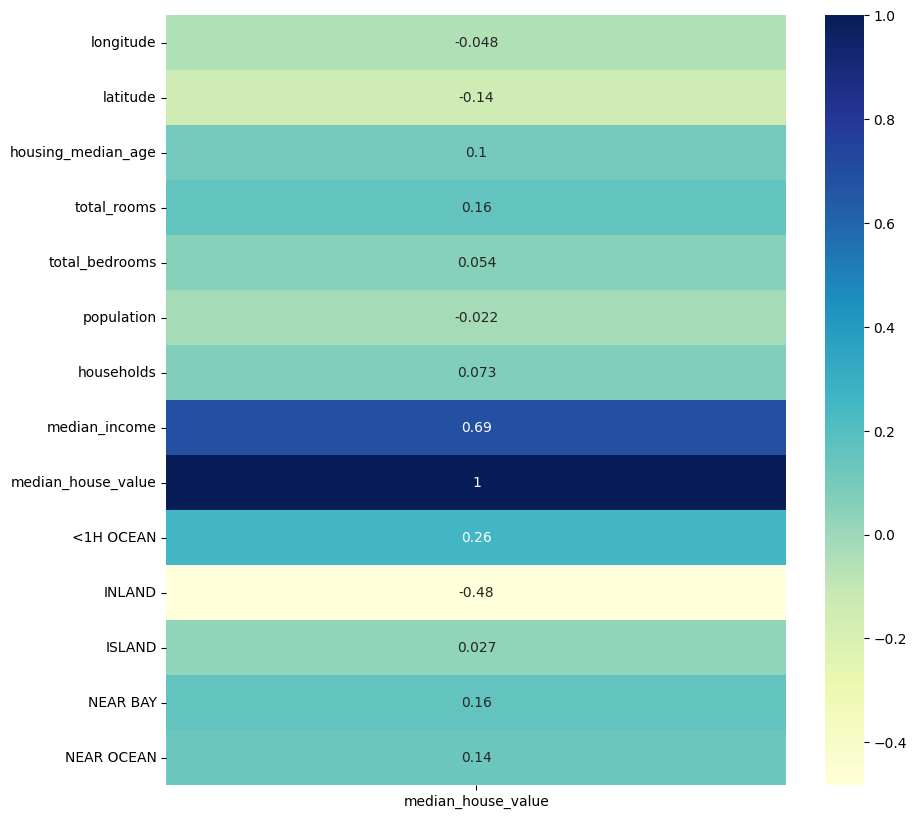

In [92]:
plt.figure(figsize=(10,10))
sns.heatmap(data_train.corr()['median_house_value'].to_frame(),annot=True, cmap='YlGnBu')

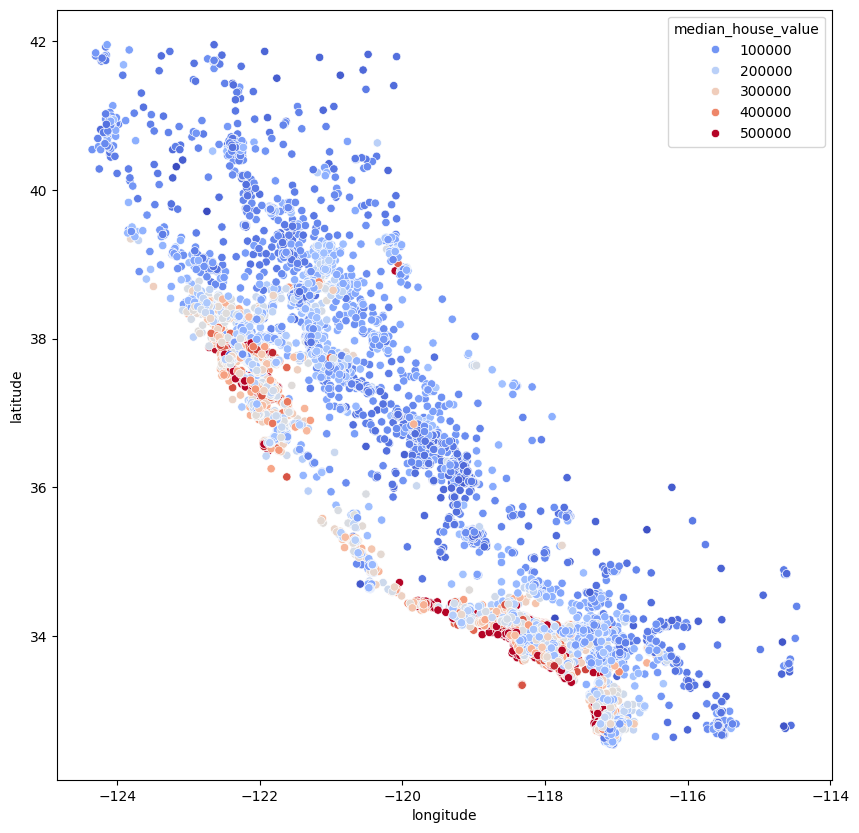

In [93]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=data_train,x='longitude',y='latitude', hue='median_house_value',palette='coolwarm' );

In [94]:
data_train['bedrooms_ratio'] = data_train['total_bedrooms'] / data_train['total_rooms']
data_train['household_rooms'] = data_train['total_rooms'] / data_train['households']

<Axes: >

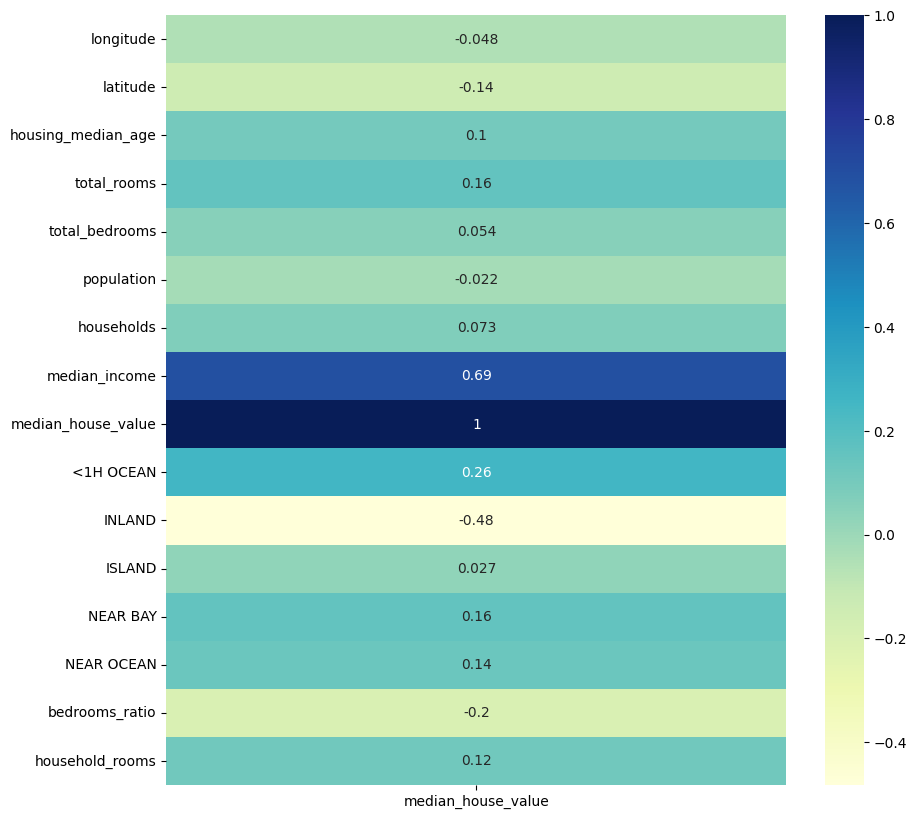

In [95]:
plt.figure(figsize=(10,10))
sns.heatmap(data_train.corr()['median_house_value'].to_frame(),annot=True, cmap='YlGnBu')

In [96]:
from sklearn.linear_model import LinearRegression

X_train, Y_train = data_train.drop(['median_house_value'],axis=1), data_train.median_house_value


LR = LinearRegression()
LR.fit(X_train, Y_train)

LinearRegression()

In [97]:
data_test = X_test.join(Y_test)

data_test['population'] = np.log1p(data_test.population)
data_test['households'] = np.log1p(data_test.households)
data_test['total_rooms'] = np.log1p(data_test.total_rooms)
data_test['total_bedrooms'] = np.log1p(data_test.total_bedrooms)

data_test = data_test.join(pd.get_dummies(data_test['ocean_proximity']).astype(int)).drop(['ocean_proximity'],axis=1)

data_test['bedrooms_ratio'] = data_test['total_bedrooms'] / data_test['total_rooms']
data_test['household_rooms'] = data_test['total_rooms'] / data_test['households']

X_test, Y_test = data_test.drop(['median_house_value'],axis=1), data_test.median_house_value


In [98]:
Y_pred = LR.predict(X_test)

In [99]:
from sklearn.metrics import r2_score

r2_score(Y_test, Y_pred)

0.6687407117584969

In [100]:
from sklearn.ensemble import RandomForestRegressor

RFR = RandomForestRegressor()
RFR.fit(X_train, Y_train)

RandomForestRegressor()

In [101]:
Y_pred = RFR.predict(X_test)
r2_score(Y_test, Y_pred)

0.8220058349252835

In [104]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [3,11,30],
    'max_features':[2,4,6,8]
}

GS = GridSearchCV(estimator=RFR, param_grid=param_grid, cv=5)
GS.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [2, 4, 6, 8],
                         'n_estimators': [3, 11, 30]})

In [105]:
GS.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30)

In [106]:
RFR = RandomForestRegressor(max_features=8, n_estimators=30)
RFR.fit(X_train, Y_train)

RandomForestRegressor(max_features=8, n_estimators=30)

In [107]:
Y_pred_new = RFR.predict(X_test)
r2_score(Y_test, Y_pred_new)

0.8157185998913924